In [25]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
# 2. Air temperature in Shenzhen during the past 25 years
df2=pd.read_csv("Baoan_Weather_1998_2022.csv")

C:\Users\60918\AppData\Local\Temp\ipykernel_8044\2092050105.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("Baoan_Weather_1998_2022.csv")


In [27]:
# 2.1 Select the valid datas
# Create a new column"cTMP_1" to extract the temperature information(e.g. if TMP="+0186,1", cTMP_1= +0186)
df2["cTMP_1"]=df2["TMP"].str[0:5].astype(int)
# Create another new column"cTMP_2" to extract the last character, which can detect the data validity.
df2["cTMP_2"]=df2["TMP"].str[-1].astype(int)
# Locate the valid data(cTMP_2= 1 or 5, means passed all quality control checks) within the temperature range(-932 to +618)
df2_new=df2.loc[((df2["cTMP_2"]==1)|(df2["cTMP_2"]==5)) & ((df2["cTMP_1"]>=-932)&(df2["cTMP_1"]<=618))]
df2_new

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND,cTMP_1,cTMP_2
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",186,1
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",220,1
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",240,1
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",221,1
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",210,1
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,"10177,1",4,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",201,1
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",200,1
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",200,1


In [28]:
# 2.2 Create two columns"Month" and "Year"
df2_new["Month"]=pd.to_datetime(df2_new["DATE"]).dt.month
df2_new["Year"]=pd.to_datetime(df2_new["DATE"]).dt.year
df2_new

C:\Users\60918\AppData\Local\Temp\ipykernel_8044\2609756307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new["Month"]=pd.to_datetime(df2_new["DATE"]).dt.month
C:\Users\60918\AppData\Local\Temp\ipykernel_8044\2609756307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new["Year"]=pd.to_datetime(df2_new["DATE"]).dt.year


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,TMP,UA1,UG1,VIS,WG1,WND,cTMP_1,cTMP_2,Month,Year
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",186,1,1,1998
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",220,1,1,1998
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",240,1,1,1998
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",221,1,1,1998
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",240,1,1,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",210,1,10,2022
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",201,1,10,2022
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",200,1,10,2022
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",200,1,10,2022


Text(0, 0.5, 'Monthly averaged air temperature per year / Degrees Celsius')

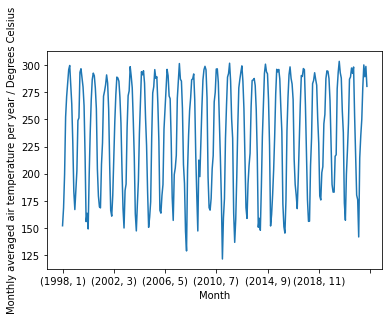

In [29]:
# 2.3.1 Considering the "Year" factor, plot the monthly averaged air temperature groupby "Year" & "Month" 
Year_Monthly_TMP=df2_new.groupby(["Year","Month"])["cTMP_1"].mean()
Year_Monthly_TMP.plot()
plt.xlabel("Month")
plt.ylabel("Monthly averaged air temperature per year / Degrees Celsius")
# From the output below, monthly averaged air temperature seemed to keep fluctuating along with year.

Text(0, 0.5, 'Monthly averaged air temperature / Degrees Celsius')

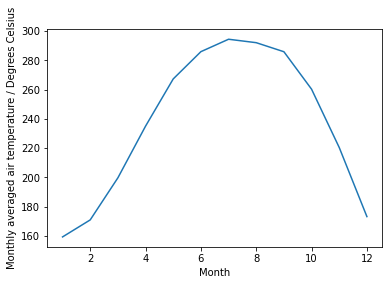

In [30]:
# 2.3.2 Without considering the "Year" factor, plot the monthly averaged air temperature groupby "Month" for 25 years
Monthly_TMP=df2_new.groupby(["Month"])["cTMP_1"].mean()
Monthly_TMP.plot()
plt.xlabel("Month")
plt.ylabel("Monthly averaged air temperature / Degrees Celsius")
# From the output below, monthly averaged air temperature tended to increase from Jan to July, and decrease from July to Dec.